In [1]:
import pandas as pd
from plot_params import *
stat_all = pd.read_csv(outdir / 'neural_network_enrichment_human_30bp.csv', index_col = 0)

In [2]:
def make_set(df, type = 'INTRON'):
    dedup = df.sort_values(by = type, ascending = False
                                 ).drop_duplicates(subset = 'RBP_official', keep = 'first')
    sub = dedup[['RBP_official', type]]
    sub.columns = [0,1]
    return sub

In [3]:
stat_all.head()

,KS statistics,pvalue,RBPNet_model,category,median difference,sig,FDR,-log10 FDR,RBP_official,is_SynGo
0,0.124132,5.077201e-221,DDX41_K562_5081,<-0.1,0.007828,True,1.428221e-220,219.845205,DDX41,False
1,0.157378,8.386508e-96,DDX41_K562_5081,>0.1,0.011556,True,1.639396e-95,94.785316,DDX41,False
2,0.134800,1.004683e-260,AQR_HepG2_ENCSR018WPY,<-0.1,0.005530,True,3.022786e-260,259.519593,AQR,False
3,0.048349,2.161708e-09,AQR_HepG2_ENCSR018WPY,>0.1,0.001083,True,2.374448e-09,8.624437,AQR,False
4,0.093777,3.832537e-126,HNRNPU_HepG2_ENCSR240MVJ,<-0.1,0.004376,True,8.781840e-126,125.056414,HNRNPU,True


In [4]:
enhancing = make_set(stat_all.loc[stat_all['category']=='<-0.1'], type = 'median difference')
supressing = make_set(stat_all.loc[stat_all['category']=='>0.1'], type = 'median difference')

In [5]:
import gseapy as gp

gene_sets = 'GO_Molecular_Function_2023'
pre_res = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=gene_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

In [6]:
import gseapy as gp

gene_sets = 'GO_Cellular_Component_2023'
pre_res_cc = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=gene_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

In [7]:
gene_sets = 'GO_Biological_Process_2023'
pre_res_bp = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=gene_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

In [8]:
domain = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets='InterPro_Domains_2019',
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

In [9]:
domain.res2d.loc[domain.res2d['FDR q-val']<0.2]

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,"K Homology domain, type 1",0.683827,1.394556,0.048565,0.190221,0.293,5/10,14.29%,IGF2BP1;HNRNPK;IGF2BP3;PCBP2;FMR1
1,prerank,K Homology domain,0.683827,1.394556,0.048565,0.190221,0.293,5/10,14.29%,IGF2BP1;HNRNPK;IGF2BP3;PCBP2;FMR1


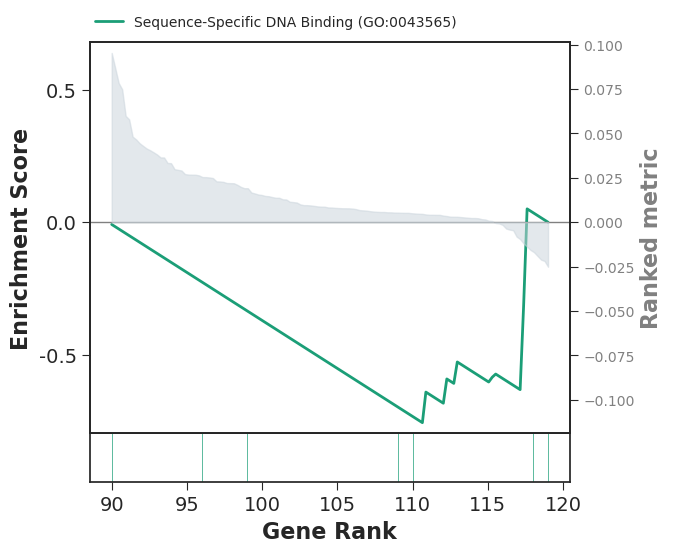

In [10]:
obj=pre_res
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms,
              figsize = (3,3)) # v1.0.5
plt.savefig(figdir / f'4_gsea_mf.pdf')

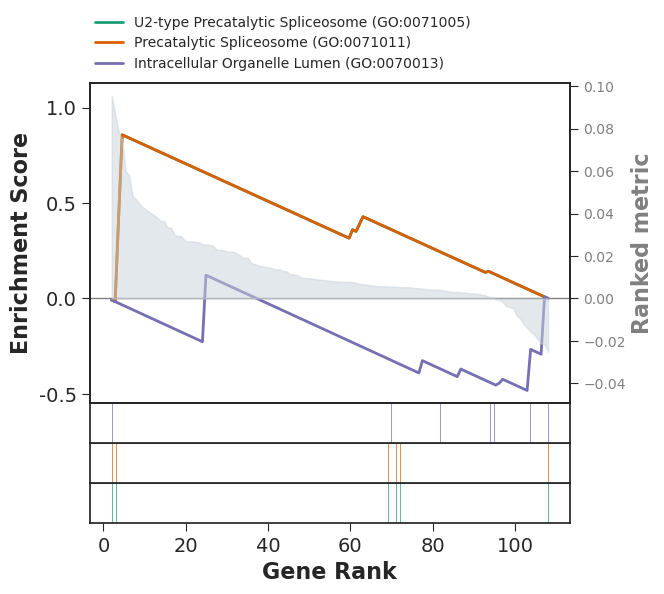

In [11]:
obj=pre_res_cc
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_c.pdf')

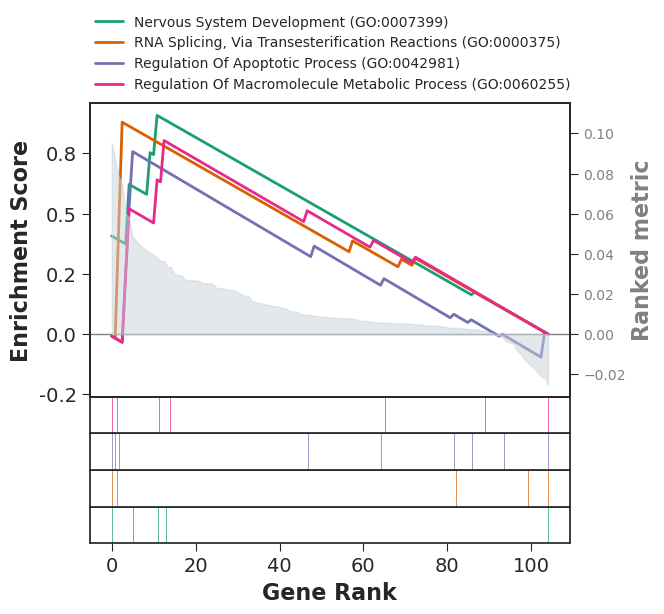

In [12]:
obj=pre_res_bp
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_bp.pdf')

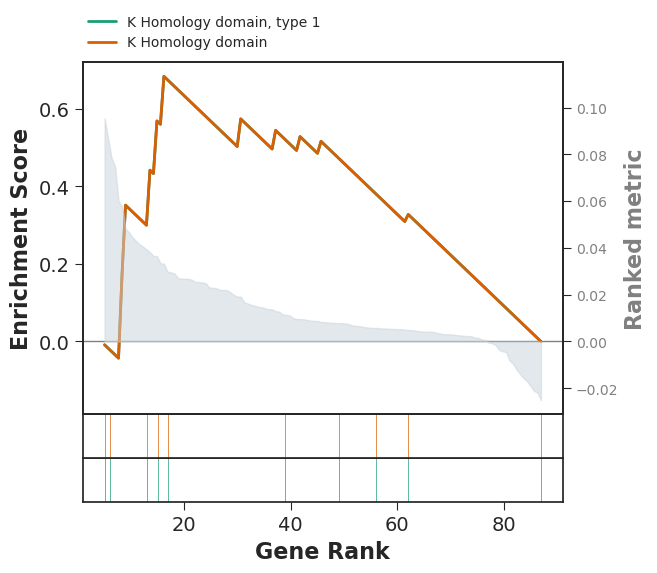

In [13]:
obj=domain
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_domain.pdf')

In [14]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [15]:
# make Karen's MS and syngo into custom gene sets!
# https://github.com/zqfang/GSEApy/issues/60

In [16]:
ipsc_b = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S4',
                  skiprows = 2)
ipsc_a = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S3',
                  skiprows = 2)

human_b = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S6',
                  skiprows = 2)
human_a = pd.read_excel('proteomics/Mei_Ideker_Supp Tables_050324.xlsx', sheet_name = 'Table S5',
                  skiprows = 2)
syngo = pd.read_excel('synGo/syngo_genes.xlsx')

In [17]:
synapse_proteomic_sets = {
    'human proteomics':list(set(human_a['Gene Symbol']).intersection(set(human_b['Gene Symbol']))),
    'iPSC proteomics': list(set(ipsc_a['Gene Symbol']).intersection(set(ipsc_b['Gene Symbol']))),
    'synGO': syngo['hgnc_symbol'].tolist()
}

In [18]:
pre_res_syn = gp.prerank(rnk=enhancing, # or rnk = rnk,
                     gene_sets=synapse_proteomic_sets,
                     min_size=5,
                     max_size=1000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=False, # see what's going on behind the scenes
                    )

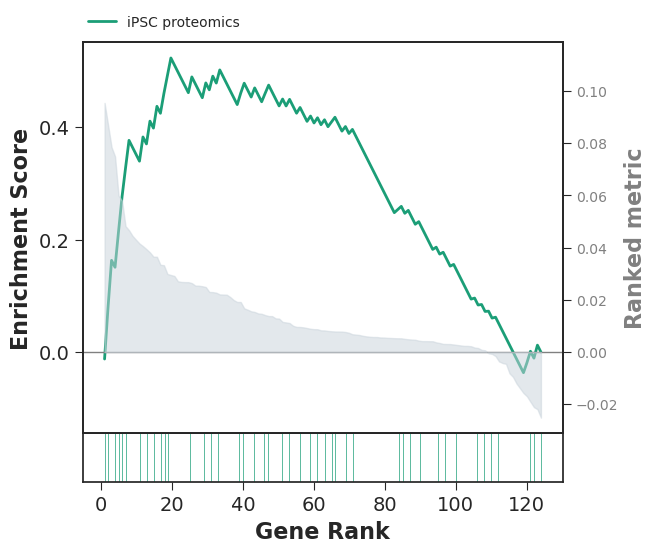

In [19]:
obj=pre_res_syn
terms = obj.res2d.loc[obj.res2d['FDR q-val']<0.2, 'Term']
axs = obj.plot(terms=terms) # v1.0.5
plt.savefig(figdir / f'4_gsea_syn.pdf')

In [20]:
obj.res2d

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,human proteomics,0.545875,1.297825,0.056,0.221328,0.169,28/65,32.54%,HNRNPM;PRPF8;TARDBP;IGF2BP1;HNRNPK;PTBP1;U2AF2...
1,prerank,iPSC proteomics,0.52331,1.248632,0.102307,0.168511,0.246,12/45,15.87%,HNRNPM;PRPF8;TARDBP;IGF2BP1;HNRNPK;PTBP1;RBFOX...
2,prerank,synGO,0.432748,0.991538,0.547208,0.534876,0.785,6/23,15.87%,HNRNPM;HNRNPK;DICER1;PCBP2;FMR1;EIF4G2
